In [1]:
from os import environ

import dotenv
import geopandas as gpd
import requests
from shapely import geometry

In [2]:
BASE_URI = "https://sensecity-africa.io"
CRS = 'epsg:4326'

# find .env automagically by walking up directories until it's found, then load
# up the .env entries as environment variables
dotenv.load_dotenv(dotenv.find_dotenv())

username = environ.get("USERNAME")
password = environ.get("PASSWORD")

In [3]:
auth_token = requests.post(
    f"{BASE_URI}/api-token-auth/",
    data=dict(username=username, password=password),
).json()["token"]

In [4]:
photos_json = requests.get(
    f"{BASE_URI}/api/photos/",
    headers=dict(authorization=f"Token {auth_token}"),
).json()

In [5]:
photos_gdf = gpd.GeoDataFrame(photos_json)
photos_gdf['location'] = photos_gdf['location'].apply(geometry.shape)
photos_gdf = photos_gdf.set_geometry('location')
photos_gdf.crs = CRS

In [6]:
photos_gdf.head()

,image,author,tags,country,city,location
0,https://fra1.digitaloceanspaces.com/sensecity-...,AK,"[Architecture, Façades]",Cameroon,Yaoundé,POINT (11.51743 3.87233)
1,https://fra1.digitaloceanspaces.com/sensecity-...,AK,[Architecture moderne],Cameroon,Yaoundé,POINT (11.51710 3.86906)
2,https://fra1.digitaloceanspaces.com/sensecity-...,AK,[Centre-ville],Cameroon,Yaoundé,POINT (11.51710 3.86906)
3,https://fra1.digitaloceanspaces.com/sensecity-...,AK,"[mototaxis, transport urbain]",Cameroon,Yaoundé,POINT (11.50348 3.86255)
4,https://fra1.digitaloceanspaces.com/sensecity-...,AK,"[assainissement, voirie]",Cameroon,Douala,POINT (9.70620 4.04294)


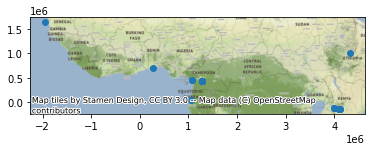

In [8]:
import contextily as ctx

ax = photos_gdf.to_crs(epsg=3857).plot()
ctx.add_basemap(ax)